#import all the library which we will use

In [929]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [930]:
#Load the data 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [931]:
#check the shape
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [932]:
#now merge the data into one dataset

data = train.append(test)
data.shape

C:\Users\honey\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(1309, 12)

In [933]:
passenger_id = test['PassengerId']

In [934]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [935]:
# set the index as passenger id.
test.set_index(["PassengerId"],inplace=True)



In [936]:
train.set_index('PassengerId',inplace=True)

In [937]:
#finding the missing value in both datasets
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [938]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

Dealing with missing values 

1. visualize the missing values......

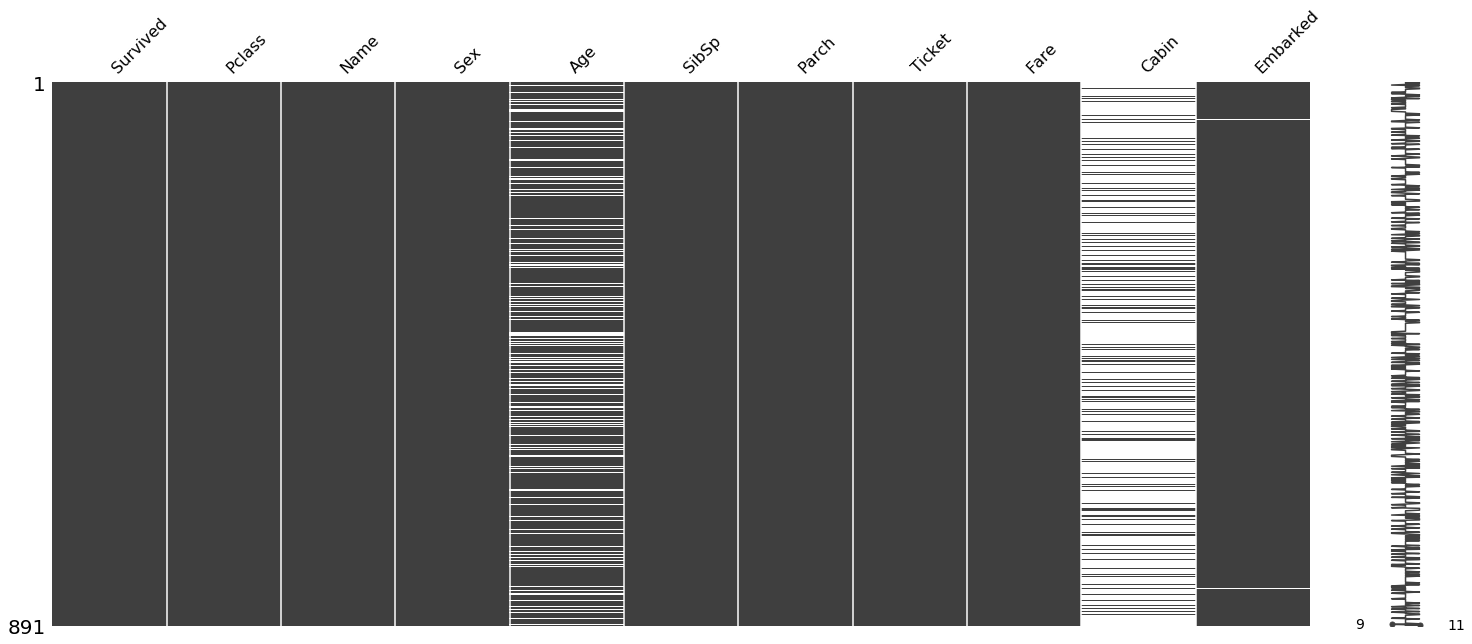

In [939]:
import missingno as mn
mn.matrix(train)

lets fill the missing values 

imputer:

In [940]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN',strategy = "median",axis = 1)
Age2 = imp.fit_transform(train['Age'].values.reshape(1,-1)) # converted into the array
Age2 = Age2.T  #putting back into the column
train['Age_train']=Age2 # adding the Age2 column into the train

Age_test = imp.fit_transform(test['Age'].values.reshape(1,-1))
Age_test = Age_test.T
test['Age_test'] = Age_test




In [941]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_train
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0


In [942]:
train.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2
Age_train      0
dtype: int64

In [943]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Age_test      0
dtype: int64

In [944]:
# use fillna to fill the Embarked values
#will see the numbers of different values present in Embarked
train.Embarked.value_counts() 



S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [945]:
# S is most happining catogry in values.

train.Embarked.fillna("S", inplace = True) #this will fill null value
train.loc[train["Embarked"] == "S","Embarked"] = 0
train.loc[train["Embarked"] == "C","Embarked"] = 1
train.loc[train["Embarked"] == "Q","Embarked"] = 2
train.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       0
Age_train      0
dtype: int64

In [946]:
test.loc[test["Embarked"] == "S","Embarked"] = 0
test.loc[test["Embarked"] == "C","Embarked"] = 1
test.loc[test["Embarked"] == "Q","Embarked"] = 2

In [947]:
#missing values of test fare

test.isnull().sum()



Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Age_test      0
dtype: int64

In [948]:
# will take all fare's column's mean and replace them.

test.Fare.fillna(test.Fare.mean(),inplace= True)

In [949]:
# will drop cabin section in both train and test

train.drop(['Age','Cabin'],axis=1,inplace = True)
test.drop(['Age','Cabin'],axis=1,inplace = True)

In [950]:
#transforming the sex into the int

train['Sex']= train.Sex.apply(lambda x:0 if x == "female" else 1)
test['Sex']= test.Sex.apply(lambda x:0 if x == "female" else 1)


In [951]:
test.Sex

PassengerId
892     1
893     0
894     1
895     1
896     0
897     1
898     0
899     1
900     0
901     1
902     1
903     1
904     0
905     1
906     0
907     0
908     1
909     1
910     0
911     0
912     1
913     1
914     0
915     1
916     0
917     1
918     0
919     1
920     1
921     1
       ..
1280    1
1281    1
1282    1
1283    0
1284    1
1285    1
1286    1
1287    0
1288    1
1289    0
1290    1
1291    1
1292    0
1293    1
1294    0
1295    1
1296    1
1297    1
1298    1
1299    1
1300    0
1301    0
1302    0
1303    0
1304    0
1305    1
1306    0
1307    1
1308    1
1309    1
Name: Sex, Length: 418, dtype: int64

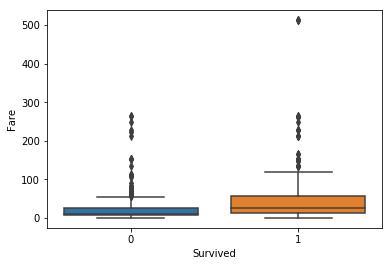

In [952]:
# Detecting the outliners.

sns.boxplot(x= "Survived", y = 'Fare',data = train ) # box plot showing the data 

Exploratory data analysis  # will see the realtionship between the data

In [953]:
#groupby function of Survived

train.groupby("Survived").mean()   # mean of survived people here is 31% survived

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_train
Survived,,,,,,,
0,2.531876,0.852459,0.553734,0.329690,22.117887,0.307832,30.028233
1,1.950292,0.318713,0.473684,0.464912,48.395408,0.447368,28.291433


In [954]:
#groupby function of Sex


train.groupby("Sex").mean()  #number of female are more than male which had survived

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Age_train
Sex,,,,,,,
0,0.742038,2.159236,0.694268,0.649682,44.479818,0.461783,27.929936
1,0.188908,2.389948,0.429809,0.235702,25.523893,0.306759,30.140676


Correlation Matrix and Heatmap

In [955]:
train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_train
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307,0.106811,-0.064910
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500,0.045702,-0.339898
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,-0.116569,0.081163
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651,-0.059961,-0.233296
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225,-0.078665,-0.172482
Fare,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000,0.062142,0.096688
Embarked,0.106811,0.045702,-0.116569,-0.059961,-0.078665,0.062142,1.000000,-0.009165
Age_train,-0.064910,-0.339898,0.081163,-0.233296,-0.172482,0.096688,-0.009165,1.000000


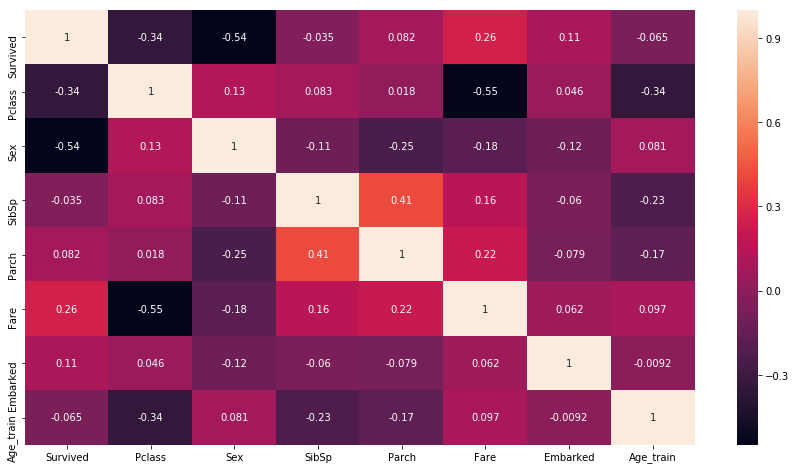

In [956]:
# heatmap

plt.subplots(figsize= (15,8))

sns.heatmap(train.corr(),annot = True)

C:\Users\honey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


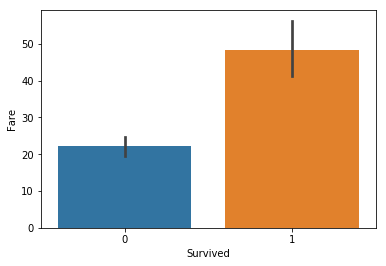

In [957]:
# Fare and Survived

sns.barplot(x = 'Survived', y = 'Fare',data = train)

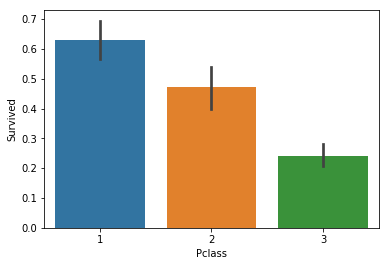

In [958]:
sns.barplot(x = 'Pclass', y = 'Survived',data = train)

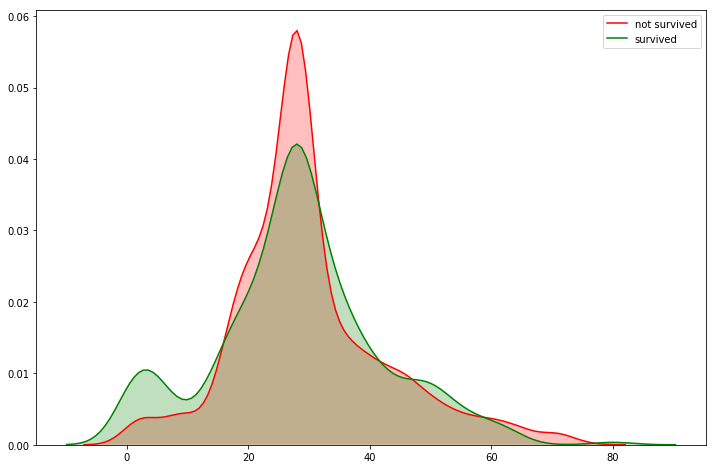

In [959]:
# age and survived
plt.subplots(figsize = (12,8))
sns.kdeplot(train.loc[(train["Survived"]==0),"Age_train"],color = 'r',shade=True,label = "not survived")
sns.kdeplot(train.loc[(train["Survived"]==1),"Age_train"],color = 'g',shade=True,label = "survived")

In [960]:
train.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_train
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,0,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,1,38.0
3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,0,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,0,35.0
5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,0,35.0


In [961]:
test.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_test
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",1,0,0,330911,7.8292,2,34.5
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,0,47.0
894,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,2,62.0
895,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,0,27.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,0,22.0


In [962]:
#drop unneccessary column


train.drop(['Name','Ticket'],axis=1,inplace = True)
test.drop(['Name','Ticket'],axis=1,inplace = True)

In [963]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_train
PassengerId,,,,,,,,
1,0,3,1,1,0,7.2500,0,22.0
2,1,1,0,1,0,71.2833,1,38.0
3,1,3,0,0,0,7.9250,0,26.0
4,1,1,0,1,0,53.1000,0,35.0
5,0,3,1,0,0,8.0500,0,35.0


In [964]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_test
PassengerId,,,,,,,
892,3,1,0,0,7.8292,2,34.5
893,3,0,1,0,7.0000,0,47.0
894,2,1,0,0,9.6875,2,62.0
895,3,1,0,0,8.6625,0,27.0
896,3,0,1,1,12.2875,0,22.0


Model Prediction

In [965]:
#making features and target
train_features = train.iloc[:, 1:]

# 'Survived' column values
train_target = train.iloc[:, 0]

In [966]:
train_target

PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     1
13     0
14     0
15     0
16     1
17     0
18     1
19     0
20     1
21     0
22     1
23     1
24     1
25     0
26     1
27     0
28     0
29     1
30     0
      ..
862    0
863    1
864    0
865    0
866    1
867    1
868    0
869    0
870    1
871    0
872    1
873    0
874    0
875    1
876    1
877    0
878    0
879    0
880    1
881    1
882    0
883    0
884    0
885    0
886    0
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [968]:
# Get the test data features,
test_feature= test.iloc[:, 0:]
test_feature


,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_test
PassengerId,,,,,,,
892,3,1,0,0,7.8292,2,34.5
893,3,0,1,0,7.0000,0,47.0
894,2,1,0,0,9.6875,2,62.0
895,3,1,0,0,8.6625,0,27.0
896,3,0,1,1,12.2875,0,22.0
897,3,1,0,0,9.2250,0,14.0
898,3,0,0,0,7.6292,2,30.0
899,2,1,1,1,29.0000,0,26.0
900,3,0,0,0,7.2292,1,18.0


Fitting our model

In [969]:
# used algorithms
lr = LogisticRegression()
lr.fit(train_features,train_target)
predict = lr.predict(test)
print(predict)




[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


C:\Users\honey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [970]:
train_target[1] # now change the index and you will able to match the predict value and acutal value

0

In [971]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()
rfr.fit(train_features,train_target)
predict = rfr.predict(test)
print(predict)
rfr.score(train_features,train_target)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


C:\Users\honey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9629629629629629

In [972]:
#used cross validation to remove overfitting and underfitting.

from sklearn import model_selection

scores= model_selection.cross_val_score(rfr,train_features,train_target,scoring = 'accuracy',cv = 50)
titanic = scores,scores.mean()

In [973]:
#now we will save the model for further predictions

import pickle
filename = "titanic"
fileobj = open(filename,'wb')
pickle.dump(titanic,fileobj)
fileobj.close()

In [974]:
filename = "titanic"
fileobj = open(filename,'rb')
titanic_score = pickle.load(fileobj)
fileobj.close()

In [975]:
print(titanic_score)

(array([0.83333333, 0.66666667, 0.66666667, 0.88888889, 0.83333333,
       0.88888889, 0.66666667, 0.83333333, 0.66666667, 0.77777778,
       0.77777778, 0.72222222, 0.83333333, 0.77777778, 0.72222222,
       0.77777778, 1.        , 0.72222222, 0.77777778, 0.77777778,
       0.88888889, 0.83333333, 0.88888889, 0.94444444, 0.77777778,
       0.83333333, 0.88888889, 0.88888889, 0.72222222, 0.83333333,
       0.72222222, 0.77777778, 0.83333333, 0.83333333, 0.88888889,
       0.77777778, 0.77777778, 0.61111111, 0.83333333, 0.83333333,
       0.83333333, 0.94444444, 0.82352941, 0.82352941, 0.70588235,
       0.76470588, 0.82352941, 0.82352941, 1.        , 0.875     ]), 0.8083496732026143)
